Problem 1. 
===
Install newest release of TensorFlow 1.5 on the operating system of your
choice. Use installation instructions on https://www.tensorflow.org site and instructions
on https://github.com/tensorflow/tensorflow. Install TensorFlow for CPU. Use attach
Jupyter notebook: 0_test_install.ipynb to demonstrate that TensorFlow is properly
installed. Please document all installation steps including the version of Python you are
using. (20%)

0_test_install
------------------
------------------
This snippet of Python creates a simple graph.

In [10]:
import tensorflow as tf
hello = tf.constant('It works!')
sess = tf.Session()
print(sess.run(hello))

b'It works!'


Check that you have a recent version of TensorFlow installed, >= 0.12.0rc0

In [11]:
print("You have version %s" % tf.__version__)

You have version 1.5.0


We'll also use matplotlib, so let's test if that's working.

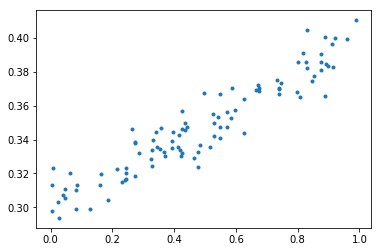

In [12]:
%matplotlib inline
import pylab
import numpy as np

# create some data using numpy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# plot it
pylab.plot(x_train, y_train, '.')

Test code end
------------------
------------------

Problem 2. 
===
Represent the following expressions in TensorFlow
$$ y = x^2 + 3$$
$$ 𝑧 = (2 ∗ 𝑦 + 4)/x$$